<img style='float: right' src="http://cer.ucsd.edu/_images/logo-bw.jpg" width="200" height="40" > <br> <br>
# Fast Camera Movie Maker
## Create movies in common formats from .cine/.h5 data


### Description:
Creates a sequence of fast camera images and saves it as .mp4

Version 1.0, 18-OCT-2016

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib inline

from IPython.display import HTML
from IPython.core.pylabtools import figsize
figsize(12,12)

import numpy as np
from PyQt4 import QtGui
import h5py, pylab, sys
from tqdm import tqdm

In [3]:
def openfile_dialog(statement):
    app = QtGui.QApplication([dir])
    fname = QtGui.QFileDialog.getOpenFileName(None, statement,'..\\..\\2  Data\\1  Fast Camera Data\\', filter="All files (*.h5)")
    filename = str(fname)
    return (h5py.File(filename,'r'),filename.split('/')[-1].split('.h5')[0])
savename = [[],[]]

hf,savename[0] = openfile_dialog('Select Raw Data: ')
hf_data = hf.get('images')
raw = np.array(hf_data)


hf,savename[1] = openfile_dialog('Select Processed Data: ')
hf_data = hf.get('images')
fluc = np.array(hf_data)


savepath = '..\\..\\3  Results\\1  Imaging Analysis Results\\'

In [4]:
print np.shape(fluc)
print savename

(96L, 96L, 3800L)
['320A_2.5kW_3.2mt_650nm', '320A_2.5kW_3.2mt_650nmdcoff']


100%|██████████████████████████████████████| 500/500 [00:00<00:00, 1096.49it/s]

Saving Movie...



C:\Users\Narwhal\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


Movie Saved


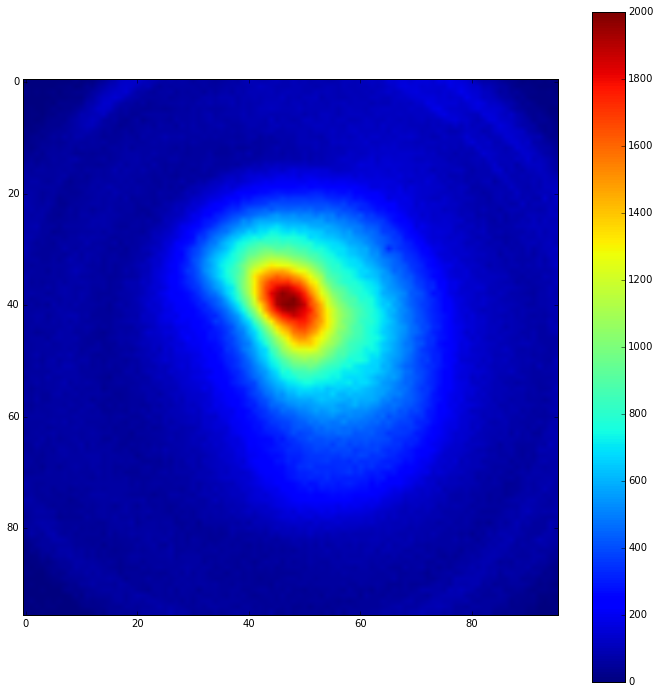

In [5]:
fig = pylab.figure()
frames = raw
imgs = []
plt.imshow(frames[:,:,1])
plt.colorbar()
plt.clim(-0,2000)
for i in tqdm(range(len(frames[1,1,0:500]))):
    frm = [plt.imshow(frames[:,:,i])]
    imgs.append(frm)
    
print 'Saving Movie...'
sys.stdout.flush()
anim = animation.ArtistAnimation(fig,imgs,interval=20,blit=False)
anim.save(savepath+savename[0]+'_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
print 'Movie Saved'

In [6]:
video = open(savepath+savename[0]+'_animation.mp4', "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
HTML(video_tag)

In [ ]:
fig = pylab.figure()
frames = fluc
imgs = []
plt.imshow(frames[:,:,1])
plt.colorbar()
plt.clim(-600,600)
for i in tqdm(range(len(frames[1,1,0:500]))):
    frm = [plt.imshow(frames[:,:,i])]
    imgs.append(frm)
    
print 'Saving Movie...'
sys.stdout.flush()
anim = animation.ArtistAnimation(fig,imgs,interval=20,blit=False)
anim.save(savepath+savename[1]+'_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
print 'Movie Saved'

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 868.06it/s]

Saving Movie...


In [ ]:
video = open(savepath+savename[1]+'_animation.mp4', "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
HTML(video_tag)

<footer>
  <p>Created by: Kyle Adriany</p>
  <p>Contact information: <a href="mailto:kyle.adriany@gmail.com">
    kyle.adriany@gmail.com</a>.</p>
    
    <p>Copyright © 2016 Kyle Adriany</p>
    
    <p>The MIT License (MIT)</p>
    

 <p>Permission is hereby granted, free of charge, to any person obtaining a copy
 of this software and associated documentation files (the "Software"), to deal
 in the Software without restriction, including without limitation the rights
 to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 copies of the Software, and to permit persons to whom the Software is
 furnished to do so, subject to the following conditions:</p>
 
 <p>The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.</p>

 <p>THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 THE SOFTWARE.</p>
</footer>